In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

# 定义日志文件路径
resnet18_lr1e_3_cutmix0 = EventAccumulator('runs_task1/resnet18_pretrained0_lr0.001_epoch200_dropout0.5_adam_lrsch1_628526').Reload()
resnet18_lr25e_5_cutmix0 = EventAccumulator('runs_task1/resnet18_pretrained0_lr0.00025_epoch200_dropout0.5_adam_lrsch1_652055').Reload()
resnet18_lr5e_4_cutmix0 = EventAccumulator('runs_task1/resnet18_pretrained0_lr0.0005_epoch300_dropout0.5_adam_lrsch1_477019').Reload()

resnet18_lr1e_3_cutmix1 = EventAccumulator('runs2/resnet18_pretrained0_lr0.001_epoch300_cutmix1_adam_lrsch1_624539').Reload()
resnet18_lr25e_5_cutmix1 = EventAccumulator('runs2/resnet18_pretrained0_lr0.0005_epoch300_dropout0.5_adam_lrsch1_595160').Reload()
resnet18_lr5e_4_cutmix1 = EventAccumulator('runs2/resnet18_pretrained0_lr0.00025_epoch300_cutmix1_adam_lrsch1_624523').Reload()

vit_dropout03_cutmix0 = EventAccumulator('runs2/vit_pretrained0_lr0.0002_epoch200_cutmix0_dropout0.3_lrsch1_675164').Reload()
vit_dropout03_cutmix1 = EventAccumulator('runs2/vit_pretrained0_lr0.0002_epoch200_cutmix1_dropout0.3_lrsch1_675177').Reload()
vit_dropout01_cutmix1 = EventAccumulator('runs2/vit_pretrained0_lr0.0002_epoch200_cutmix1_dropout0.1_lrsch1_693826').Reload()
vit_dropout01_cutmix0 = EventAccumulator('runs2/vit_pretrained0_lr0.0002_epoch200_cutmix0_dropout0.1_lrsch1_693842').Reload()
vit_dropout00_cutmix0 = EventAccumulator('runs2/vit_pretrained0_lr0.0002_epoch200_cutmix0_dropout0_lrsch1_711758').Reload()
vit_dropout00_cutmix1 = EventAccumulator('runs2/vit_pretrained0_lr0.0002_epoch200_cutmix1_dropout0_lrsch1_711772').Reload()

In [3]:
# 提取 epoch, loss 和 accuracy 数据
epochs = [x.step for x in resnet18_lr1e_3_cutmix0.Scalars('Loss/test')]

train_loss_resnet18_lr1e_3_cutmix0 = [x.value for x in resnet18_lr1e_3_cutmix0.Scalars('Loss/train')]
train_accuracy_resnet18_lr1e_3_cutmix0 = [x.value for x in resnet18_lr1e_3_cutmix0.Scalars('Accuracy/train')]
val_loss_resnet18_lr1e_3_cutmix0 = [x.value for x in resnet18_lr1e_3_cutmix0.Scalars('Loss/test')]
val_accuracy_resnet18_lr1e_3_cutmix0 = [x.value for x in resnet18_lr1e_3_cutmix0.Scalars('Accuracy/test')]

train_loss_resnet18_lr25e_5_cutmix0 = [x.value for x in resnet18_lr25e_5_cutmix0.Scalars('Loss/train')]
train_accuracy_resnet18_lr25e_5_cutmix0 = [x.value for x in resnet18_lr25e_5_cutmix0.Scalars('Accuracy/train')]
val_loss_resnet18_lr25e_5_cutmix0 = [x.value for x in resnet18_lr25e_5_cutmix0.Scalars('Loss/test')]
val_accuracy_resnet18_lr25e_5_cutmix0 = [x.value for x in resnet18_lr25e_5_cutmix0.Scalars('Accuracy/test')]

train_loss_resnet18_lr5e_4_cutmix0 = [x.value for x in resnet18_lr5e_4_cutmix0.Scalars('Loss/train')][:200]
train_accuracy_resnet18_lr5e_4_cutmix0 = [x.value for x in resnet18_lr5e_4_cutmix0.Scalars('Accuracy/train')][:200]
val_loss_resnet18_lr5e_4_cutmix0 = [x.value for x in resnet18_lr5e_4_cutmix0.Scalars('Loss/test')][:200]
val_accuracy_resnet18_lr5e_4_cutmix0 = [x.value for x in resnet18_lr5e_4_cutmix0.Scalars('Accuracy/test')][:200]

train_loss_resnet18_lr1e_3_cutmix1 = [x.value for x in resnet18_lr1e_3_cutmix1.Scalars('Loss/train')][:200]
train_accuracy_resnet18_lr1e_3_cutmix1 = [x.value for x in resnet18_lr1e_3_cutmix1.Scalars('Accuracy/train')][:200]
val_loss_resnet18_lr1e_3_cutmix1 = [x.value for x in resnet18_lr1e_3_cutmix1.Scalars('Loss/test')][:200]
val_accuracy_resnet18_lr1e_3_cutmix1 = [x.value for x in resnet18_lr1e_3_cutmix1.Scalars('Accuracy/test')][:200]

train_loss_resnet18_lr25e_5_cutmix1 = [x.value for x in resnet18_lr25e_5_cutmix1.Scalars('Loss/train')][:200]
train_accuracy_resnet18_lr25e_5_cutmix1 = [x.value for x in resnet18_lr25e_5_cutmix1.Scalars('Accuracy/train')][:200]
val_loss_resnet18_lr25e_5_cutmix1 = [x.value for x in resnet18_lr25e_5_cutmix1.Scalars('Loss/test')][:200]
val_accuracy_resnet18_lr25e_5_cutmix1 = [x.value for x in resnet18_lr25e_5_cutmix1.Scalars('Accuracy/test')][:200]

train_loss_resnet18_lr5e_4_cutmix1 = [x.value for x in resnet18_lr5e_4_cutmix1.Scalars('Loss/train')][:200]
train_accuracy_resnet18_lr5e_4_cutmix1 = [x.value for x in resnet18_lr5e_4_cutmix1.Scalars('Accuracy/train')][:200]
val_loss_resnet18_lr5e_4_cutmix1 = [x.value for x in resnet18_lr5e_4_cutmix1.Scalars('Loss/test')][:200]
val_accuracy_resnet18_lr5e_4_cutmix1 = [x.value for x in resnet18_lr5e_4_cutmix1.Scalars('Accuracy/test')][:200]

train_loss_vit_dropout03_cutmix0 = [x.value for x in vit_dropout03_cutmix0.Scalars('Loss/train')]
train_accuracy_vit_dropout03_cutmix0 = [x.value for x in vit_dropout03_cutmix0.Scalars('Accuracy/train')]
val_loss_vit_dropout03_cutmix0 = [x.value for x in vit_dropout03_cutmix0.Scalars('Loss/test')]
val_accuracy_vit_dropout03_cutmix0 = [x.value for x in vit_dropout03_cutmix0.Scalars('Accuracy/test')]

train_loss_vit_dropout03_cutmix1 = [x.value for x in vit_dropout03_cutmix1.Scalars('Loss/train')]
train_accuracy_vit_dropout03_cutmix1 = [x.value for x in vit_dropout03_cutmix1.Scalars('Accuracy/train')]
val_loss_vit_dropout03_cutmix1 = [x.value for x in vit_dropout03_cutmix1.Scalars('Loss/test')]
val_accuracy_vit_dropout03_cutmix1 = [x.value for x in vit_dropout03_cutmix1.Scalars('Accuracy/test')]

train_loss_vit_dropout01_cutmix0 = [x.value for x in vit_dropout01_cutmix0.Scalars('Loss/train')]
train_accuracy_vit_dropout01_cutmix0 = [x.value for x in vit_dropout01_cutmix0.Scalars('Accuracy/train')]
val_loss_vit_dropout01_cutmix0 = [x.value for x in vit_dropout01_cutmix0.Scalars('Loss/test')]
val_accuracy_vit_dropout01_cutmix0 = [x.value for x in vit_dropout01_cutmix0.Scalars('Accuracy/test')]

train_loss_vit_dropout01_cutmix1 = [x.value for x in vit_dropout01_cutmix1.Scalars('Loss/train')]
train_accuracy_vit_dropout01_cutmix1 = [x.value for x in vit_dropout01_cutmix1.Scalars('Accuracy/train')]
val_loss_vit_dropout01_cutmix1 = [x.value for x in vit_dropout01_cutmix1.Scalars('Loss/test')]
val_accuracy_vit_dropout01_cutmix1 = [x.value for x in vit_dropout01_cutmix1.Scalars('Accuracy/test')]

train_loss_vit_dropout00_cutmix0 = [x.value for x in vit_dropout00_cutmix0.Scalars('Loss/train')]
train_accuracy_vit_dropout00_cutmix0 = [x.value for x in vit_dropout00_cutmix0.Scalars('Accuracy/train')]
val_loss_vit_dropout00_cutmix0 = [x.value for x in vit_dropout00_cutmix0.Scalars('Loss/test')]
val_accuracy_vit_dropout00_cutmix0 = [x.value for x in vit_dropout00_cutmix0.Scalars('Accuracy/test')]

train_loss_vit_dropout00_cutmix1 = [x.value for x in vit_dropout00_cutmix1.Scalars('Loss/train')]
train_accuracy_vit_dropout00_cutmix1 = [x.value for x in vit_dropout00_cutmix1.Scalars('Accuracy/train')]
val_loss_vit_dropout00_cutmix1 = [x.value for x in vit_dropout00_cutmix1.Scalars('Loss/test')]
val_accuracy_vit_dropout00_cutmix1 = [x.value for x in vit_dropout00_cutmix1.Scalars('Accuracy/test')]

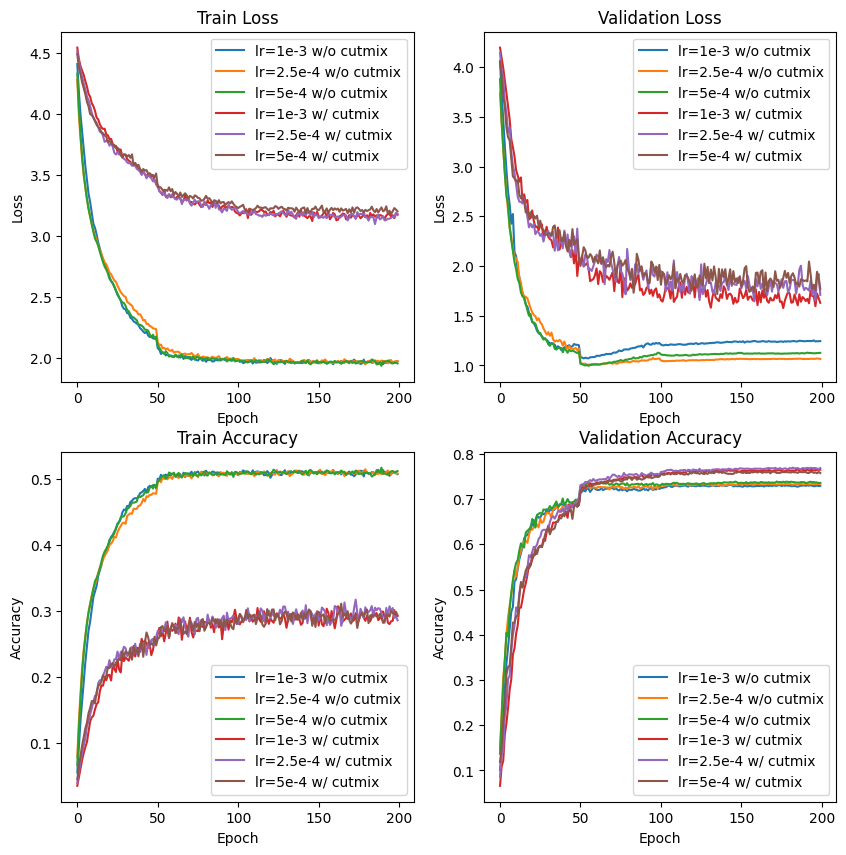

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss_resnet18_lr1e_3_cutmix0, label='lr=1e-3 w/o cutmix')
plt.plot(epochs, train_loss_resnet18_lr25e_5_cutmix0, label='lr=2.5e-4 w/o cutmix')
plt.plot(epochs, train_loss_resnet18_lr5e_4_cutmix0, label='lr=5e-4 w/o cutmix')
plt.plot(epochs, train_loss_resnet18_lr1e_3_cutmix1, label='lr=1e-3 w/ cutmix')
plt.plot(epochs, train_loss_resnet18_lr25e_5_cutmix1, label='lr=2.5e-4 w/ cutmix')
plt.plot(epochs, train_loss_resnet18_lr5e_4_cutmix1, label='lr=5e-4 w/ cutmix')
plt.legend()
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, val_loss_resnet18_lr1e_3_cutmix0, label='lr=1e-3 w/o cutmix')
plt.plot(epochs, val_loss_resnet18_lr25e_5_cutmix0, label='lr=2.5e-4 w/o cutmix')
plt.plot(epochs, val_loss_resnet18_lr5e_4_cutmix0, label='lr=5e-4 w/o cutmix')
plt.plot(epochs, val_loss_resnet18_lr1e_3_cutmix1, label='lr=1e-3 w/ cutmix')
plt.plot(epochs, val_loss_resnet18_lr25e_5_cutmix1, label='lr=2.5e-4 w/ cutmix')
plt.plot(epochs, val_loss_resnet18_lr5e_4_cutmix1, label='lr=5e-4 w/ cutmix')
plt.legend()
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracy_resnet18_lr1e_3_cutmix0, label='lr=1e-3 w/o cutmix')
plt.plot(epochs, train_accuracy_resnet18_lr25e_5_cutmix0, label='lr=2.5e-4 w/o cutmix')
plt.plot(epochs, train_accuracy_resnet18_lr5e_4_cutmix0, label='lr=5e-4 w/o cutmix')
plt.plot(epochs, train_accuracy_resnet18_lr1e_3_cutmix1, label='lr=1e-3 w/ cutmix')
plt.plot(epochs, train_accuracy_resnet18_lr25e_5_cutmix1, label='lr=2.5e-4 w/ cutmix')
plt.plot(epochs, train_accuracy_resnet18_lr5e_4_cutmix1, label='lr=5e-4 w/ cutmix')
plt.legend()
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracy_resnet18_lr1e_3_cutmix0, label='lr=1e-3 w/o cutmix')
plt.plot(epochs, val_accuracy_resnet18_lr25e_5_cutmix0, label='lr=2.5e-4 w/o cutmix')
plt.plot(epochs, val_accuracy_resnet18_lr5e_4_cutmix0, label='lr=5e-4 w/o cutmix')
plt.plot(epochs, val_accuracy_resnet18_lr1e_3_cutmix1, label='lr=1e-3 w/ cutmix')
plt.plot(epochs, val_accuracy_resnet18_lr25e_5_cutmix1, label='lr=2.5e-4 w/ cutmix')
plt.plot(epochs, val_accuracy_resnet18_lr5e_4_cutmix1, label='lr=5e-4 w/ cutmix')
plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_resnet18.png')
plt.show()
plt.close()


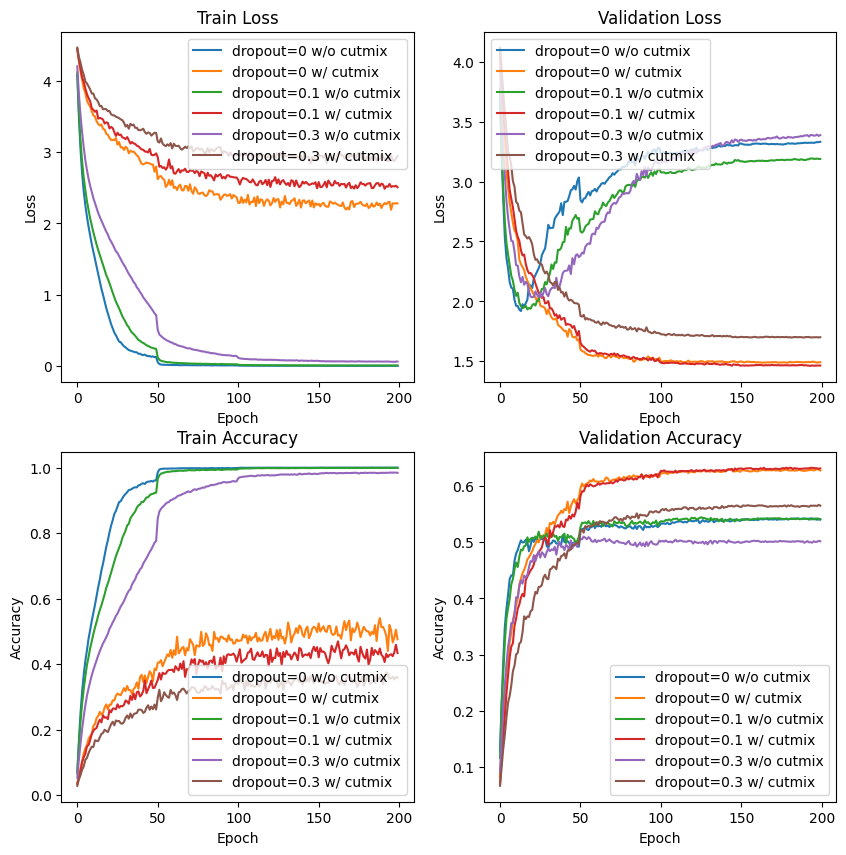

In [5]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss_vit_dropout00_cutmix0, label='dropout=0 w/o cutmix')
plt.plot(epochs, train_loss_vit_dropout00_cutmix1, label='dropout=0 w/ cutmix')
plt.plot(epochs, train_loss_vit_dropout01_cutmix0, label='dropout=0.1 w/o cutmix')
plt.plot(epochs, train_loss_vit_dropout01_cutmix1, label='dropout=0.1 w/ cutmix')
plt.plot(epochs, train_loss_vit_dropout03_cutmix0, label='dropout=0.3 w/o cutmix')
plt.plot(epochs, train_loss_vit_dropout03_cutmix1, label='dropout=0.3 w/ cutmix')
plt.legend()
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, val_loss_vit_dropout00_cutmix0, label='dropout=0 w/o cutmix')
plt.plot(epochs, val_loss_vit_dropout00_cutmix1, label='dropout=0 w/ cutmix')
plt.plot(epochs, val_loss_vit_dropout01_cutmix0, label='dropout=0.1 w/o cutmix')
plt.plot(epochs, val_loss_vit_dropout01_cutmix1, label='dropout=0.1 w/ cutmix')
plt.plot(epochs, val_loss_vit_dropout03_cutmix0, label='dropout=0.3 w/o cutmix')
plt.plot(epochs, val_loss_vit_dropout03_cutmix1, label='dropout=0.3 w/ cutmix')
plt.legend()
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracy_vit_dropout00_cutmix0, label='dropout=0 w/o cutmix')
plt.plot(epochs, train_accuracy_vit_dropout00_cutmix1, label='dropout=0 w/ cutmix')
plt.plot(epochs, train_accuracy_vit_dropout01_cutmix0, label='dropout=0.1 w/o cutmix')
plt.plot(epochs, train_accuracy_vit_dropout01_cutmix1, label='dropout=0.1 w/ cutmix')
plt.plot(epochs, train_accuracy_vit_dropout03_cutmix0, label='dropout=0.3 w/o cutmix')
plt.plot(epochs, train_accuracy_vit_dropout03_cutmix1, label='dropout=0.3 w/ cutmix')
plt.legend()
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracy_vit_dropout00_cutmix0, label='dropout=0 w/o cutmix')
plt.plot(epochs, val_accuracy_vit_dropout00_cutmix1, label='dropout=0 w/ cutmix')
plt.plot(epochs, val_accuracy_vit_dropout01_cutmix0, label='dropout=0.1 w/o cutmix')
plt.plot(epochs, val_accuracy_vit_dropout01_cutmix1, label='dropout=0.1 w/ cutmix')
plt.plot(epochs, val_accuracy_vit_dropout03_cutmix0, label='dropout=0.3 w/o cutmix')
plt.plot(epochs, val_accuracy_vit_dropout03_cutmix1, label='dropout=0.3 w/ cutmix')
plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.savefig('plot_vis/loss_acc_vit.png')
plt.show()


In [6]:
print('val_accuracy_resnet18_lr1e_3_cutmix0', np.array(val_accuracy_resnet18_lr1e_3_cutmix0).max(),np.array(val_accuracy_resnet18_lr1e_3_cutmix0).argmax())
print('val_accuracy_resnet18_lr25e_5_cutmix0', np.array(val_accuracy_resnet18_lr25e_5_cutmix0).max(),np.array(val_accuracy_resnet18_lr25e_5_cutmix0).argmax())
print('val_accuracy_resnet18_lr5e_4_cutmix0', np.array(val_accuracy_resnet18_lr5e_4_cutmix0).max(),np.array(val_accuracy_resnet18_lr5e_4_cutmix0).argmax())
print('val_accuracy_resnet18_lr1e_3_cutmix1', np.array(val_accuracy_resnet18_lr1e_3_cutmix1).max(),np.array(val_accuracy_resnet18_lr1e_3_cutmix1).argmax())
print('val_accuracy_resnet18_lr25e_5_cutmix1', np.array(val_accuracy_resnet18_lr25e_5_cutmix1).max(),np.array(val_accuracy_resnet18_lr25e_5_cutmix1).argmax())
print('val_accuracy_resnet18_lr5e_4_cutmix1', np.array(val_accuracy_resnet18_lr5e_4_cutmix1).max(),np.array(val_accuracy_resnet18_lr5e_4_cutmix1).argmax())
print('val_accuracy_vit_dropout03_cutmix0', np.array(val_accuracy_vit_dropout03_cutmix0).max(),np.array(val_accuracy_vit_dropout03_cutmix0).argmax())
print('val_accuracy_vit_dropout03_cutmix1', np.array(val_accuracy_vit_dropout03_cutmix1).max(),np.array(val_accuracy_vit_dropout03_cutmix1).argmax())
print('val_accuracy_vit_dropout01_cutmix0', np.array(val_accuracy_vit_dropout01_cutmix0).max(),np.array(val_accuracy_vit_dropout01_cutmix0).argmax())
print('val_accuracy_vit_dropout01_cutmix1', np.array(val_accuracy_vit_dropout01_cutmix1).max(),np.array(val_accuracy_vit_dropout01_cutmix1).argmax())
print('val_accuracy_vit_dropout00_cutmix0', np.array(val_accuracy_vit_dropout00_cutmix0).max(),np.array(val_accuracy_vit_dropout00_cutmix0).argmax())
print('val_accuracy_vit_dropout00_cutmix1', np.array(val_accuracy_vit_dropout00_cutmix1).max(),np.array(val_accuracy_vit_dropout00_cutmix1).argmax())


val_accuracy_resnet18_lr1e_3_cutmix0 0.7311999797821045 143
val_accuracy_resnet18_lr25e_5_cutmix0 0.7342000007629395 179
val_accuracy_resnet18_lr5e_4_cutmix0 0.7386999726295471 172
val_accuracy_resnet18_lr1e_3_cutmix1 0.7659000158309937 191
val_accuracy_resnet18_lr25e_5_cutmix1 0.7694000005722046 182
val_accuracy_resnet18_lr5e_4_cutmix1 0.760699987411499 161
val_accuracy_vit_dropout03_cutmix0 0.5101000070571899 52
val_accuracy_vit_dropout03_cutmix1 0.5665000081062317 198
val_accuracy_vit_dropout01_cutmix0 0.5444999933242798 125
val_accuracy_vit_dropout01_cutmix1 0.6327000260353088 178
val_accuracy_vit_dropout00_cutmix0 0.5425000190734863 193
val_accuracy_vit_dropout00_cutmix1 0.6299999952316284 197


In [7]:
# val_accuracy_resnet18_lr25e_5_cutmix1
# val_accuracy_vit_dropout01_cutmix1

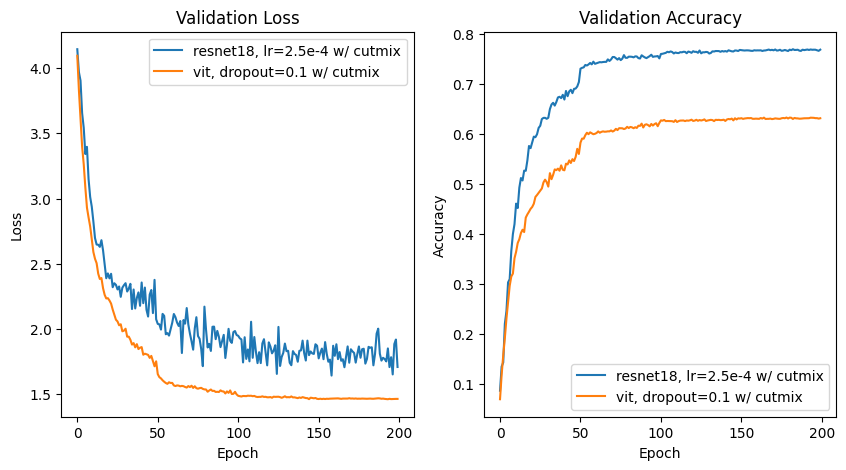

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, val_loss_resnet18_lr25e_5_cutmix1, label='resnet18, lr=2.5e-4 w/ cutmix')
plt.plot(epochs, val_loss_vit_dropout01_cutmix1, label='vit, dropout=0.1 w/ cutmix')
plt.legend()
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)

plt.plot(epochs, val_accuracy_resnet18_lr25e_5_cutmix1, label='resnet18, lr=2.5e-4 w/ cutmix')
plt.plot(epochs, val_accuracy_vit_dropout01_cutmix1, label='vit, dropout=0.1 w/ cutmix')
plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_best_task2.png')
plt.show()
plt.close()
